In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Problem set 3
## Question1
Part a

In [304]:
def diffusion_FE(phi_fn, k=1, dx=1, L=100, dt=0.01, T=50, snapshots=[], f=None):
    ''' Diffusion equation dphi/dt = k d^2phi/dx^2 + f(x,t) 
    BC: phi(0) = phi(L) = 0
    Forcing f
    
    Given initial condition phi_fn(np.array -> np.array), solve the
    diffusion equation using forward Euler with coef k on domain [0,L]
    with grid space dx. Simulate to time T with timestep dt. Save
    extra snapshots as a list of indices.'''
    if dt > dx**2/(2*k):
        print("Unstable, check dt")
    if f is None:
        f = lambda x, t: 0
    if isinstance(snapshots, int):
        Nt = int(T/dt)
        snapshots = np.arange(0, Nt, Nt//snapshots)
    # Time and space axis
    t_list = np.arange(0, T, dt, dtype=np.float64)
    x = np.arange(0, L+dx, dx, dtype=np.float64)
    
    # IC
    phi = np.array(phi_fn(x), dtype=np.float64)
    
    phi_list = []
    ts = []
    
    n = len(x)
    dtdx = k*dt/dx**2
    
    # Matrix for FE
    M = (1-2*dtdx)*np.identity(n) + \
        dtdx*np.diag([1]*(n-1), 1) + \
        dtdx*np.diag([1]*(n-1), -1)
    
    # Enforce BC
    M[0,0], M[n-1,n-1] = 0., 0.

    for i, t in enumerate(t_list):
        if i in snapshots:
            phi_list.append(phi)
            ts.append(t)
        phi = M@phi  # FE step
        phi += dt*f(x, t) # Add forcing

    if t not in ts:  # Save last snapshot
        phi_list.append(phi)
        ts.append(t)
    return x, ts, phi_list

def plot_phis(x, ts, phi_list):
    colors = plt.cm.magma(np.linspace(0, 1, len(phi_list)))
    for i, phi in enumerate(phi_list):
        plt.plot(x, phi, label=f"{ts[i]:.2f}", color=colors[i])
    plt.legend(loc='upper right')


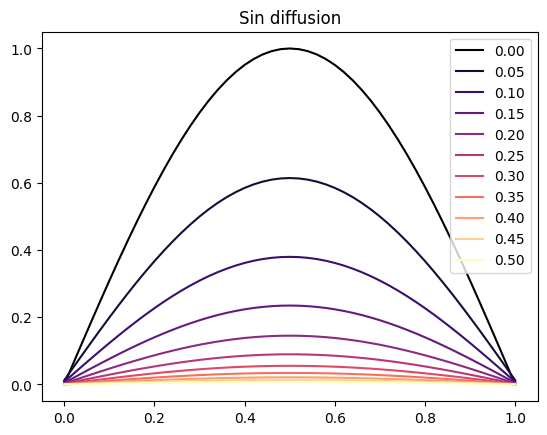

In [306]:
ic = lambda x: np.sin(np.pi*x)
out = diffusion_FE(ic, k=1, dx=1/50, L=1, dt=1e-4, T=.5, snapshots=10)
plt.title("Sin diffusion")
plot_phis(*out)

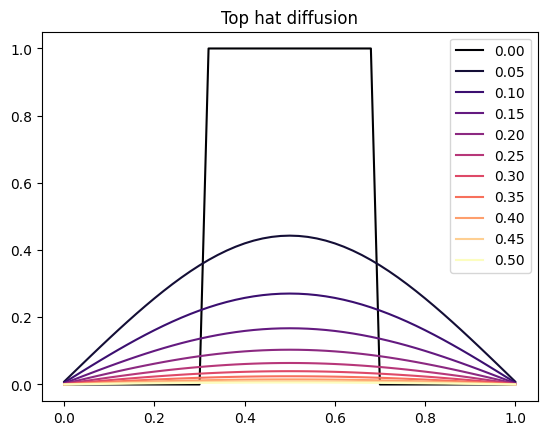

In [307]:
ic = lambda x: (x>.3)*(x<.7)
out = diffusion_FE(ic, k=1, dx=1/50, L=1, dt=1e-4, T=.5, snapshots=10)
plt.title("Top hat diffusion")
plot_phis(*out)

(we can use Fourier analysis to find analytic solution to heat equation)

Unstable, check dt


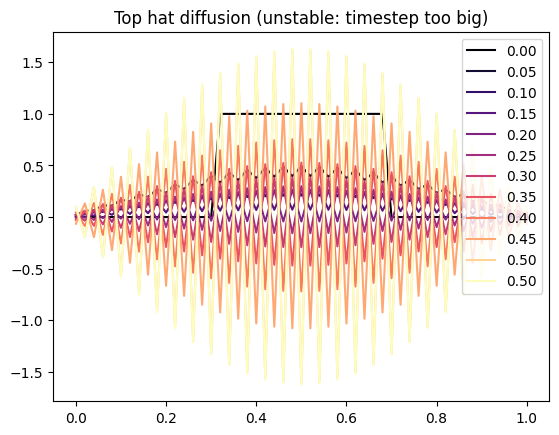

In [308]:
ic = lambda x: (x>.3)*(x<.7)
out = diffusion_FE(ic, k=1, dx=1/50, L=1, dt=2.0034e-4, T=.5, snapshots=10)
plt.title("Top hat diffusion (unstable: timestep too big)")
plot_phis(*out)

Part b

In [309]:
def diffusion_LF(phi_fn, k=1, dx=1, L=100, dt=0.01, T=50, snapshots=[]):
    ''' Diffusion equation dphi/dt = k d^2phi/dx^2
    BC: phi(0) = phi(L) = 0
    
    Given initial condition phi_fn(np.array -> np.array), solve the
    diffusion equation using leaf frog with coef k on domain [0,L]
    with grid space dx. Simulate to time T with timestep dt. Save
    extra snapshots as a list of indices.'''
    if isinstance(snapshots, int):
        Nt = int(T/dt)
        snapshots = np.arange(0, Nt, Nt//snapshots)

    # Time and space axis
    t_list = np.arange(0, T, dt*2, dtype=np.float64)
    x = np.arange(0, L+dx, dx, dtype=np.float64)
    
    # IC: Step forward once
    _, _, phi = diffusion_FE(phi_fn, k, dx, L, dt, dt*2, snapshots=[0, 1])

    phi_list = []
    ts = []
    
    n = len(x)
    dtdx = 2*k*dt/dx**2
    
    # Matrix for Leapfrog
    M = (1-2*dtdx)*np.identity(n) + \
        dtdx*np.diag([1]*(n-1), 1) + \
        dtdx*np.diag([1]*(n-1), -1)
    
    # Enforce BC
    M[0,0], M[n-1,n-1] = 0., 0.

    for i, t in enumerate(t_list):
        if i in snapshots:
            phi_list.append(phi[0])
            ts.append(t)
        phi[0] = M@phi[0]  # First leapfrog step
        phi[1] = M@phi[1]  # Second leapfrog step

    if t not in ts:  # Save last snapshot
        phi_list.extend(phi)
        ts.extend([t-dt, t])
    return x, ts, phi_list

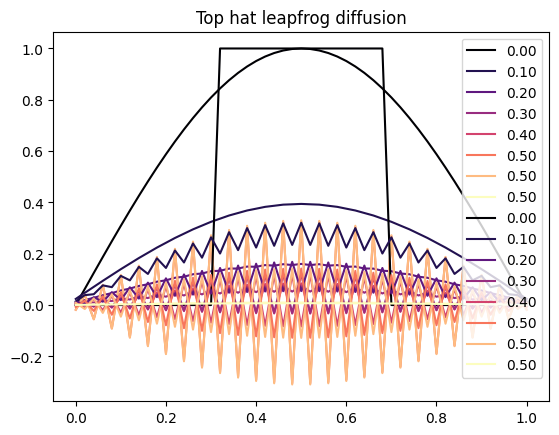

In [310]:
ic = lambda x: np.sin(np.pi*x)
out = diffusion_LF(ic, k=1, dx=1/50, L=1, dt=1.0026e-4, T=.5, snapshots=10)
plt.title("Sin leapfrog diffusion")
plot_phis(*out)

ic = lambda x: (x>.3)*(x<.7)
out = diffusion_LF(ic, k=1, dx=1/50, L=1, dt=1.0012e-4, T=.5, snapshots=10)
plt.title("Top hat leapfrog diffusion")
plot_phis(*out)

We see oscilations which indicate stability issues.

## Question 2
part a

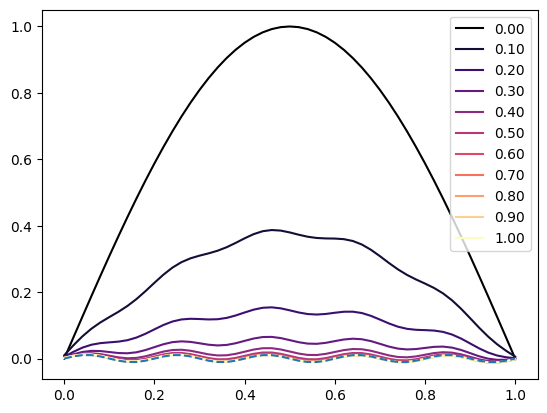

In [ ]:
ic = lambda x: np.sin(np.pi*x)
forcing = lambda x, t: 10*np.sin(10*np.pi*x)
out = diffusion_FE(ic, k=1, dx=1/50, L=1, dt=1e-4, T=1, snapshots=10, f=forcing)
plot_phis(*out)
plt.plot(out[0], forcing(out[0], 0)*1e-2*np.e/25, '--', label="Forcing")
plt.show()